## Contents

- [Introduction](#Introduction)
- [Data Load & EDA](#Data-Load-&-EDA)
- [Applying CLT](#Applying-CLT)

## Introduction

This is another *introduction* to Central Limit Theorem. I will be using StudentPerformance data sourced through Kaggle to show how it is possible to answer the following type of questions with Central Limit Theorem:

- Does the highest level of education achieved by a parent influence the grades achieved by their children?
- Does the type of lunch offered influence education achievement?
- Does ethnicity influence educational achievement?
- Did completing the preparation course improve the grades achieved?

**My definition of Central Limit Theorem:**

Central Limit Theorem is a phenomena comprised of multiple benefits. The most popular is that, regardless of the population distribution, repeatedly sampling and plotting the means of these samples will return a normal distibrution. This allows us to apply statistical methods which are reserved for normal distributions to any dataset. It is particularly useful when determining the probabilistic likelihood a value will sit within a given range. Another benefit of central limit theorem is the ability to derive summary statistics for a population from a sample, helping us understand the expected variability of a dataset, even if we are not able to pull from the population.

For central limit theorem to be successful, we need at least 30 responses in each sample. Conducting 1000 samples seems to be a good number (?).  

**ChatGPT Definition (for comparison & review):**


Central Limit Theorem (CLT) Definition:

The Central Limit Theorem states that the distribution of the sample means will approximate a normal distribution as the sample size increases, regardless of the population's original distribution. This holds true under the conditions that the samples are independent and identically distributed (i.i.d.) and the sample size is sufficiently large (commonly n ≥ 30).

Key Points:

Normal Distribution of Sample Means: As sample size increases, the means of samples tend to form a normal distribution.

Applications: The CLT enables the use of statistical methods, such as confidence intervals and hypothesis testing, that assume normality.

Sample Size: A typical guideline is that a sample size of 30 or more is adequate for the CLT to apply, though this may vary.

Limitations: It applies primarily to sample means, not individual data points, and requires independent sampling.

By utilizing the CLT, statisticians can analyze data from non-normal populations effectively.

**CLT Questions** 

## Data Load and EDA

In [100]:
import pandas as pd

In [101]:
data = pd.read_csv('StudentsPerformance.csv')
data = pd.DataFrame(data)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [103]:
data.shape

(1000, 8)

In [104]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


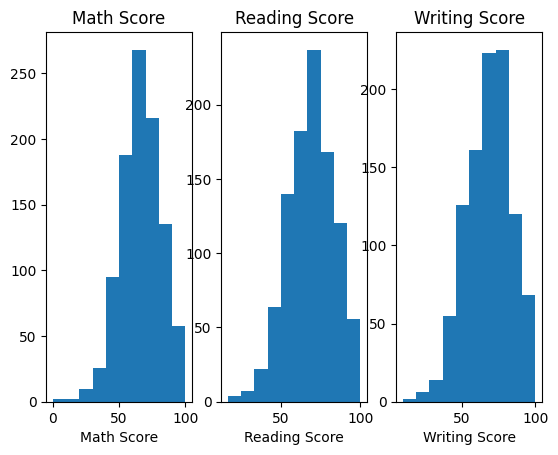

In [105]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1,3)
"""
plt.hist(data['math score'])
plt.title("Distribution of Math Score")
plt.xlabel('Score')
plt.ylabel('Count of Students')
plt.show()
"""
axis[0].hist(data['math score'])
axis[0].set_title("Math Score")
axis[0].set_xlabel("Math Score")

axis[1].hist(data['reading score'])
axis[1].set_title("Reading Score")
axis[1].set_xlabel("Reading Score")

axis[2].hist(data['writing score'])
axis[2].set_title("Writing Score")
axis[2].set_xlabel("Writing Score")

plt.show()

In [106]:
education_level = data['parental level of education'].unique()

for level in education_level:
    filtered_data = data[data['parental level of education']==level]
    print(f"{level}: {round(filtered_data['math score'].mean(), 3)}")

bachelor's degree: 69.39
some college: 67.128
master's degree: 69.746
associate's degree: 67.883
high school: 62.138
some high school: 63.497


## Applying CLT


To produce the function and accompanying outputs, I inputted a failing script to chatGPT which provided an accurate solution. I then took notes on what the script was doing at each step, deleted it and rebuilt it using the notes and referencing to the chatGPT output when absolutely required to support. This means I have still built the code and can speak to every action being taken.

In [107]:
import numpy as np

In [70]:
def clt_func(data, target, iterations=1000, sample_size=None):
    """
    var data: DataFrame to target
    var target: column to perform CLT on
    var iterations: number of bootstrapping iterations to perform
    var sample_size: size of the sample
    return: array of outputs
    """
    # filter the data to just the set we want to display in iteration and return just the one column to target
    data = data[data['parental level of education']==level]['math score']
    # snap sample size to the size of the df
    if sample_size is None:
        sample_size = len(data)
    sample_means = []
    for _ in range(iterations):
        sample_vals = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(sample_vals.mean())
    return np.array(sample_means)

In [108]:
categories = data['parental level of education'].unique()
bootstrap_results = {}

In [109]:
for category in categories:
    bootstrap_results[category] = clt_func(data, school)

In [110]:
df_output = pd.DataFrame(bootstrap_results)
df_output

,bachelor's degree,some college,master's degree,associate's degree,high school,some high school
0,64.195531,64.681564,63.569832,65.776536,62.005587,64.564246
1,64.636872,63.519553,63.474860,63.536313,61.726257,62.888268
2,65.067039,64.351955,64.681564,65.480447,64.502793,64.541899
3,63.324022,62.949721,63.268156,64.698324,61.184358,63.022346
4,65.960894,63.374302,63.452514,63.391061,61.558659,64.821229
...,...,...,...,...,...,...
995,64.251397,62.871508,66.167598,64.608939,65.776536,63.715084
996,62.497207,63.150838,64.888268,62.441341,62.832402,63.608939
997,62.955307,65.726257,65.011173,65.698324,64.011173,63.351955
998,63.452514,63.094972,60.804469,65.575419,64.324022,63.139665


In [111]:
bootstrap_summary = {}

for category, sample_means in bootstrap_results.items():
    mean = np.mean(sample_means)
    ci_lower = np.percentile(sample_means, 2.5)
    ci_upper = np.percentile(sample_means, 97.5)
    bootstrap_summary[category] = {'mean':mean, 'ci_lower':ci_lower, 'ci_upper':ci_upper}

In [125]:
for category, summary in bootstrap_summary.items():
    print(f"Category: {category}")
    print("")
    print(f"Mean: {summary['mean']}")
    print(f"Lower Confidence Interval: {summary['ci_lower']}")
    print(f"Upper Confidence Interval: {summary['ci_upper']}")
    print("")

Category: bachelor's degree

Mean: 63.529631284916206
Lower Confidence Interval: 61.104608938547486
Upper Confidence Interval: 65.83924581005587

Category: some college

Mean: 63.44950279329609
Lower Confidence Interval: 61.04441340782123
Upper Confidence Interval: 65.70446927374302

Category: master's degree

Mean: 63.54716201117319
Lower Confidence Interval: 61.26243016759776
Upper Confidence Interval: 65.87206703910614

Category: associate's degree

Mean: 63.47605586592179
Lower Confidence Interval: 60.97178770949721
Upper Confidence Interval: 65.77653631284916

Category: high school

Mean: 63.50180446927374
Lower Confidence Interval: 61.25600558659218
Upper Confidence Interval: 65.73770949720671

Category: some high school

Mean: 63.49583798882681
Lower Confidence Interval: 61.34050279329609
Upper Confidence Interval: 65.75991620111732



In [123]:
#define a target score to establish
target_score = 65

probabilities = {}

for category, sample_means in bootstrap_results.items():
    # Calculate the proportion of bootstrap samples exceeding the target score
    proportion_exceeding_target = np.mean(sample_means > target_score)
    probabilities[category] = proportion_exceeding_target

print("Probabilities of Exceeding a score of 65 in the Maths exam:")
for category, prob in probabilities.items():
    print(f"{category}: {prob:.4f}")

Probabilities of Exceeding a score of 65 in the Maths exam:
bachelor's degree: 0.1030
some college: 0.0950
master's degree: 0.1160
associate's degree: 0.1170
high school: 0.0990
some high school: 0.0970
